<a href="https://colab.research.google.com/github/abodedaniel/Ellipitical-Blob-Counter-with-CNN/blob/main/EllipticalBlobCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN Model for Elliptical Blob Counter by Abode Daniel**


Importing the required libraries


In [301]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os
from skimage import io, transform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

torch.cuda.is_available()

True


> Mounting Google drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

Creating Tranforms Object for Transformation and Data Augmentation


In [306]:
transfrm = transforms.Compose([
         transforms.Grayscale(num_output_channels=1),
         transforms.Pad(4),
         transforms.ToTensor(),
        transforms.Normalize([0.9],[0.1])
       ])
transfrm2 = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Pad(4),
        transforms.RandomRotation(90),transforms.ToTensor(),
       transforms.Normalize([0.9],[0.1])])
transfrm3 = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Pad(4),
        transforms.RandomRotation(180), transforms.ToTensor(),
        transforms.Normalize([0.9],[0.1])])

transfrm4 = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Pad(4),
        transforms.RandomRotation(270), transforms.ToTensor(),
        transforms.Normalize([0.8],[0.1])])

transfrm5 = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Pad(4),
        transforms.RandomRotation(45), transforms.ToTensor(),
        transforms.Normalize([0.8],[0.1])])

Importing Images and transforming using the ImageFolder class and DataLoader to create Train loader and test Loader


In [ ]:
root = '/content/drive/MyDrive/Colab Notebooks/'
data = datasets.ImageFolder(os.path.join(root, 'shapes_dataset_HR'), transform=transfrm)
data2 = datasets.ImageFolder(os.path.join(root, 'shapes_dataset_HR'), transform=transfrm2)
data3 = datasets.ImageFolder(os.path.join(root, 'shapes_dataset_HR'), transform=transfrm3)
data4 = datasets.ImageFolder(os.path.join(root, 'shapes_dataset_HR'), transform=transfrm4)
data5 = datasets.ImageFolder(os.path.join(root, 'shapes_dataset_HR'), transform=transfrm5)
datax = ConcatDataset(datasets=[data,data2,data3,data4,data5])
train_size = int(0.8 * len(datax))
test_size = len(datax) - train_size
train_dataset, test_dataset = random_split(datax, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, pin_memory=True )
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True, pin_memory=True )

Generating a print of a single batch of test and train images

Label: [4 5 1 4 1 0 1 1 0 5 0 3 2 5 1 1 3 4 1 3 2 4 0 0 3 2 5 3 1 3 1 2 5 3 3 4 3
 3 0 5 2 5 0 4 4 4 0 5 4 1 5 2 4 5 2 5 4 0 0 0 4 3 4 5 3 5 3 4 3 2 1 2 0 1
 1 0 2 2 4 1 1 1 1 0 3 3 0 1 5 0 1 0 4 3 2 0 0 5 1 1]
Class: 4 5 1 4 1 0 1 1 0 5 0 3 2 5 1 1 3 4 1 3 2 4 0 0 3 2 5 3 1 3 1 2 5 3 3 4 3 3 0 5 2 5 0 4 4 4 0 5 4 1 5 2 4 5 2 5 4 0 0 0 4 3 4 5 3 5 3 4 3 2 1 2 0 1 1 0 2 2 4 1 1 1 1 0 3 3 0 1 5 0 1 0 4 3 2 0 0 5 1 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: [1 5 2 4 5 3 1 0 3 5 0 2 4 3 3 3 4 2 5 4 0 4 0 1 5 4 1 5 2 1 4 0 3 2 1 0 0
 1 0 5 0 0 1 3 1 4 5 4 0 5 4 5 2 0 2 4 2 0 3 1 5 3 0 2 1 2 2 5 2 0 5 1 1 3
 4 4 1 5 2 5 3 4 0 4 1 0 4 5 2 5 1 4 1 2 3 1 0 4 2 4]
Class: 1 5 2 4 5 3 1 0 3 5 0 2 4 3 3 3 4 2 5 4 0 4 0 1 5 4 1 5 2 1 4 0 3 2 1 0 0 1 0 5 0 0 1 3 1 4 5 4 0 5 4 5 2 0 2 4 2 0 3 1 5 3 0 2 1 2 2 5 2 0 5 1 1 3 4 4 1 5 2 5 3 4 0 4 1 0 4 5 2 5 1 4 1 2 3 1 0 4 2 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


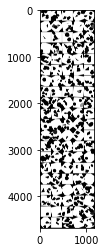

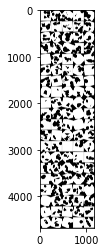

In [ ]:
for images,labels in test_loader: 
    break
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

for images,labels in train_loader: 
    break
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

#Ignore Section: This section is to view an image after application to the convolutional layer

In [ ]:
for i, (X_train, y_train) in enumerate(train_dataset):
    break

In [ ]:

conv1 = nn.Conv2d(1, 4, 7, 1,padding=(4, 4))
conv2 = nn.Conv2d(4, 8, 5, 1)
conv3 = nn.Conv2d(8, 16, 3, 1)
conv4 = nn.Conv2d(16,32,3,1)
conv5 = nn.Conv2d(32,64,3,3)
conv6 = nn.Conv2d(64,128,3,3)
#conv4 =  nn.Conv1d(16,8,3,1)
#conv3 = nn.Conv2d(64,128, 3, 1,padding=(2, 2))
dropout = nn.Dropout(0.25)
fc1 = nn.Linear(4*53*53, 240)
fc2 = nn.Linear(240, 60)

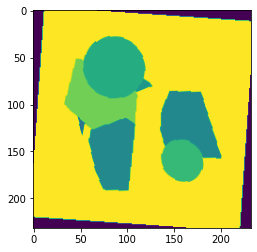

In [ ]:
x = X_train.view(1,1,232,232)
plt.imshow(x[0][0].detach().numpy())

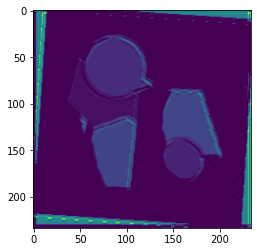

In [ ]:
x = F.relu(conv1(x))
x.shape
plt.imshow(x[0][0].detach().numpy())

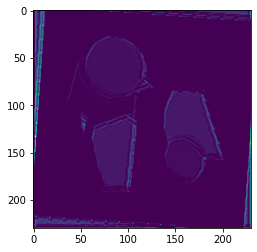

In [ ]:
x = F.relu(conv2(x))
plt.imshow(x[0][0].detach().numpy())

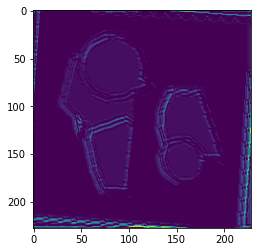

In [ ]:
x = F.relu(conv3(x))
plt.imshow(x[0][0].detach().numpy())

In [ ]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 114, 114])

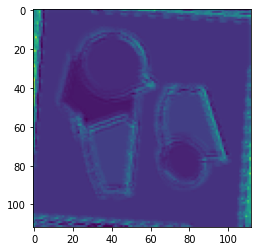

In [ ]:
x = F.relu(conv4(x))
plt.imshow(x[0][0].detach().numpy())

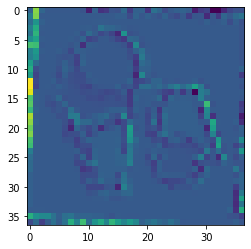

In [ ]:
x = F.relu(conv5(x))
plt.imshow(x[0][0].detach().numpy())

In [ ]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 64, 18, 18])

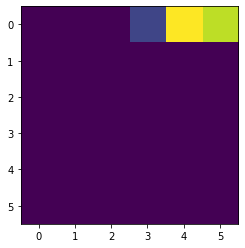

In [ ]:
x = F.relu(conv6(x))
plt.imshow(x[0][0].detach().numpy())

#Creating the Convolutional Neural Network Model
Creating the CNN model

In [ ]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 7, 1,padding=(4, 4))
        self.conv2 = nn.Conv2d(4, 8, 5, 1)
        self.conv3 = nn.Conv2d(8, 16, 3,1)
        self.conv4 = nn.Conv2d(16,32,3,1)
        self.conv5 = nn.Conv2d(32,64,3,3)
        self.conv6 = nn.Conv2d(64,128,3,3)
        self.fc1 = nn.Linear(128* 6* 6, 60)
        self.fc2 = nn.Linear(60,6)
       
        
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        #X = F.dropout2d(X,0.25)
        X = F.relu(self.conv2(X))
        #X = F.max_pool2d(X, 2, 2)
        #X = F.dropout2d(X,0.25)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        #X = F.dropout2d(X,0.25)
        X = F.relu(self.conv4(X))
        #X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv5(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv6(X))
        #X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 128* 6* 6)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)


Initializing the model 

In [ ]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
CNNmodel = CNNmodel.cuda()
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adagrad(CNNmodel.parameters(), lr=0.00001)
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(1, 4, kernel_size=(7, 7), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(3, 3))
  (conv6): Conv2d(64, 128, kernel_size=(3, 3), stride=(3, 3))
  (fc1): Linear(in_features=4608, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=6, bias=True)
)

In [ ]:
next(CNNmodel.parameters()).is_cuda

True

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [ ]:
count_parameters(CNNmodel)

     196
       4
     800
       8
    1152
      16
    4608
      32
   18432
      64
   73728
     128
  276480
      60
     360
       6
________
  376074


# Training the model

In [ ]:
import time
start_time = time.time()

epochs = 200

max_trn_batch = 400
max_tst_batch = 100

train_losses = []
test_losses = []
train_correct = []
test_correct = []
tst_correct = np.zeros(epochs)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        X_train = X_train.cuda()
        y_train = y_train.cuda()
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
       
    print(f'epoch: {i:2}  batch: {b:4} loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            X_test = X_test.cuda()
            y_test = y_test.cuda()
            # Limit the number of batches
            if b == max_tst_batch:
                break
            b+=1
            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
        
                
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    tst_correct[i] = tst_corr

        
    print(f'test epoch: {i:2}  batch: {b:4}  loss: {loss.item():10.8f}  \
accuracy: {tst_corr.item()*100/(100*b):7.3f}%')
    
    if(tst_corr == max(tst_correct)):
        torch.save(CNNmodel, 'ElipseCountCNNModel1')
        print('saved model')

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


epoch:  0  batch:  400 loss: 1.20628357  accuracy:  38.903%
test epoch:  0  batch:  100  loss: 1.36013150  accuracy:  42.270%
saved model
epoch:  1  batch:  400 loss: 1.23951840  accuracy:  44.148%
test epoch:  1  batch:  100  loss: 1.15886629  accuracy:  44.310%
saved model
epoch:  2  batch:  400 loss: 1.20950055  accuracy:  45.750%
test epoch:  2  batch:  100  loss: 1.32823956  accuracy:  44.690%
saved model
epoch:  3  batch:  400 loss: 1.10331035  accuracy:  48.428%
test epoch:  3  batch:  100  loss: 1.05162489  accuracy:  50.730%
saved model
epoch:  4  batch:  400 loss: 0.96781373  accuracy:  55.130%
test epoch:  4  batch:  100  loss: 0.90071368  accuracy:  57.710%
saved model
epoch:  5  batch:  400 loss: 0.88817948  accuracy:  59.608%
test epoch:  5  batch:  100  loss: 0.94042325  accuracy:  60.140%
saved model
epoch:  6  batch:  400 loss: 0.86774194  accuracy:  59.785%
test epoch:  6  batch:  100  loss: 0.81675965  accuracy:  60.160%
saved model
epoch:  7  batch:  400 loss: 0.918

epoch: 63  batch:  400 loss: 0.44100630  accuracy:  81.043%
test epoch: 63  batch:  100  loss: 0.69999832  accuracy:  76.990%
epoch: 64  batch:  400 loss: 0.43892348  accuracy:  81.155%
test epoch: 64  batch:  100  loss: 0.57183701  accuracy:  77.230%
epoch: 65  batch:  400 loss: 0.55492055  accuracy:  82.578%
test epoch: 65  batch:  100  loss: 0.68348473  accuracy:  78.480%
epoch: 66  batch:  400 loss: 0.27037385  accuracy:  82.392%
test epoch: 66  batch:  100  loss: 0.49718410  accuracy:  78.280%
epoch: 67  batch:  400 loss: 0.50210959  accuracy:  82.772%
test epoch: 67  batch:  100  loss: 0.53887910  accuracy:  77.510%
epoch: 68  batch:  400 loss: 0.33379117  accuracy:  82.907%
test epoch: 68  batch:  100  loss: 0.30370301  accuracy:  80.640%
saved model
epoch: 69  batch:  400 loss: 0.60609770  accuracy:  83.302%
test epoch: 69  batch:  100  loss: 0.56927902  accuracy:  80.490%
epoch: 70  batch:  400 loss: 0.41227040  accuracy:  83.868%
test epoch: 70  batch:  100  loss: 0.38605198 

epoch: 127  batch:  400 loss: 0.32100421  accuracy:  84.832%
test epoch: 127  batch:  100  loss: 0.36816144  accuracy:  82.330%
epoch: 128  batch:  400 loss: 0.39497489  accuracy:  85.793%
test epoch: 128  batch:  100  loss: 0.42612693  accuracy:  82.310%
epoch: 129  batch:  400 loss: 0.22789323  accuracy:  86.103%
test epoch: 129  batch:  100  loss: 0.55236661  accuracy:  82.320%
epoch: 130  batch:  400 loss: 0.41575298  accuracy:  86.255%
test epoch: 130  batch:  100  loss: 0.56640977  accuracy:  81.670%
epoch: 131  batch:  400 loss: 0.36781323  accuracy:  86.210%
test epoch: 131  batch:  100  loss: 0.30991238  accuracy:  83.250%
epoch: 132  batch:  400 loss: 0.27864379  accuracy:  86.610%
test epoch: 132  batch:  100  loss: 0.65061349  accuracy:  82.350%
epoch: 133  batch:  400 loss: 0.21637161  accuracy:  86.285%
test epoch: 133  batch:  100  loss: 0.45681036  accuracy:  83.340%
epoch: 134  batch:  400 loss: 0.30735007  accuracy:  86.368%
test epoch: 134  batch:  100  loss: 0.35945

epoch: 191  batch:  400 loss: 0.32185468  accuracy:  87.620%
test epoch: 191  batch:  100  loss: 0.38993949  accuracy:  83.070%
epoch: 192  batch:  400 loss: 0.18807228  accuracy:  88.420%
test epoch: 192  batch:  100  loss: 0.29104331  accuracy:  85.350%
epoch: 193  batch:  400 loss: 0.31575471  accuracy:  88.297%
test epoch: 193  batch:  100  loss: 0.39951766  accuracy:  84.380%
epoch: 194  batch:  400 loss: 0.24532957  accuracy:  88.403%
test epoch: 194  batch:  100  loss: 0.48544207  accuracy:  85.010%
epoch: 195  batch:  400 loss: 0.32296008  accuracy:  88.433%
test epoch: 195  batch:  100  loss: 0.38016009  accuracy:  84.780%
epoch: 196  batch:  400 loss: 0.28825378  accuracy:  88.377%
test epoch: 196  batch:  100  loss: 0.28508544  accuracy:  85.180%
epoch: 197  batch:  400 loss: 0.27772444  accuracy:  88.520%
test epoch: 197  batch:  100  loss: 0.42666420  accuracy:  85.080%
epoch: 198  batch:  400 loss: 0.29411680  accuracy:  88.440%
test epoch: 198  batch:  100  loss: 0.48697

Plotting the Loss 

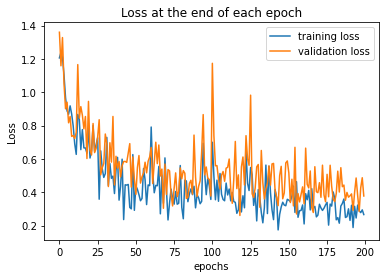

In [ ]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend();
plt.savefig('loss.jpg',dpi=300)

Plotting the Accuracy

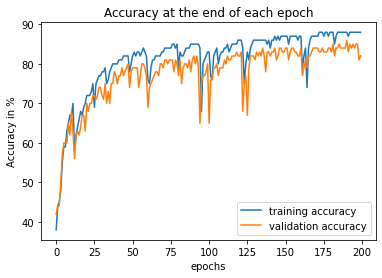

In [ ]:
plt.plot([t*100/(40000) for t in train_correct], label='training accuracy')
plt.plot([t*100/(10000) for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.ylabel('Accuracy in %')
plt.xlabel('epochs')
plt.legend();
plt.savefig('accuracy.jpg',dpi=300)

#Loading the model for test

In [ ]:
model = torch.load('/content/drive/MyDrive/Colab Notebooks/ElipseCountCNNModel1')
model.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(1, 4, kernel_size=(7, 7), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(3, 3))
  (conv6): Conv2d(64, 128, kernel_size=(3, 3), stride=(3, 3))
  (fc1): Linear(in_features=4608, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=6, bias=True)
)

In [ ]:
test_load_all = DataLoader(test_dataset, batch_size=1000, shuffle=True)
for x_test, y_test in test_load_all:
    x_test = x_test.cuda()
    y_test = y_test.cuda()
    break
    
with torch.no_grad():
    correct = 0
    y_val = model(x_test).cuda()
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{1000} = {correct.item()*100/(1000):7.3f}%')

Test accuracy: 888/1000 =  88.800%


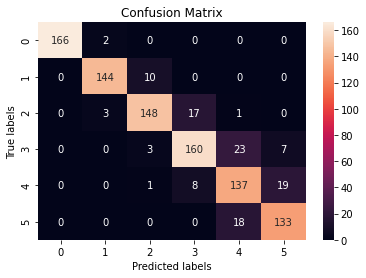

In [ ]:
# print a row of values for reference
import seaborn as sns
y_test = y_test.cpu()
predicted = predicted.cpu()

# print the confusion matrix
cm = confusion_matrix(predicted.view(-1), y_test.view(-1))
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt='d', ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5']); ax.yaxis.set_ticklabels(['0','1','2','3','4','5']);
plt.savefig('Confusionmatrix.jpg',dpi=300)

#Skip: Viewing the weight of the Filters 

In [ ]:
def plot_filters_single_channel_big(t):

  #setting the rows and columns
  nrows = t.shape[0]*t.shape[2]
  ncols = t.shape[1]*t.shape[3]


  npimg = np.array(t.numpy(), np.float32)
  npimg = npimg.transpose((0, 2, 1, 3))
  npimg = npimg.ravel().reshape(nrows, ncols)

  npimg = npimg.T

  fig, ax = plt.subplots(figsize=(10*ncols/10, 10*nrows/200))    
  imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

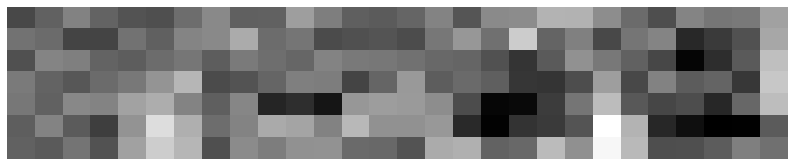

In [ ]:
x = model.conv1.weight.data
x = x.cpu()
#plt.imshow(x[0][0])
plot_filters_single_channel_big(x)

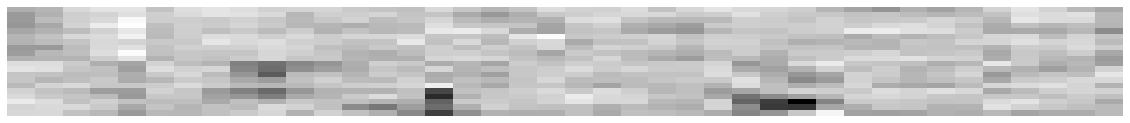

In [ ]:
x2 = model.conv2.weight.data
x2 = x2.cpu()
plot_filters_single_channel_big(x2)

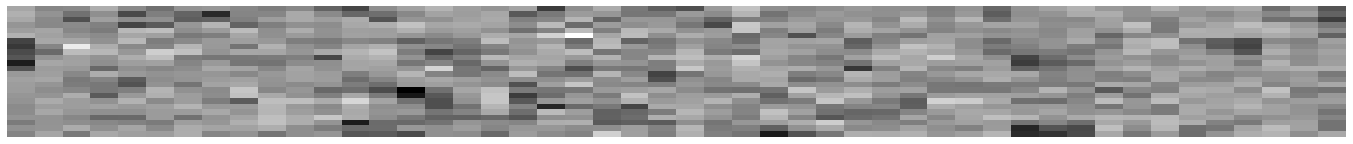

In [ ]:
x3 = model.conv3.weight.data
x3 = x3.cpu()
plot_filters_single_channel_big(x3)

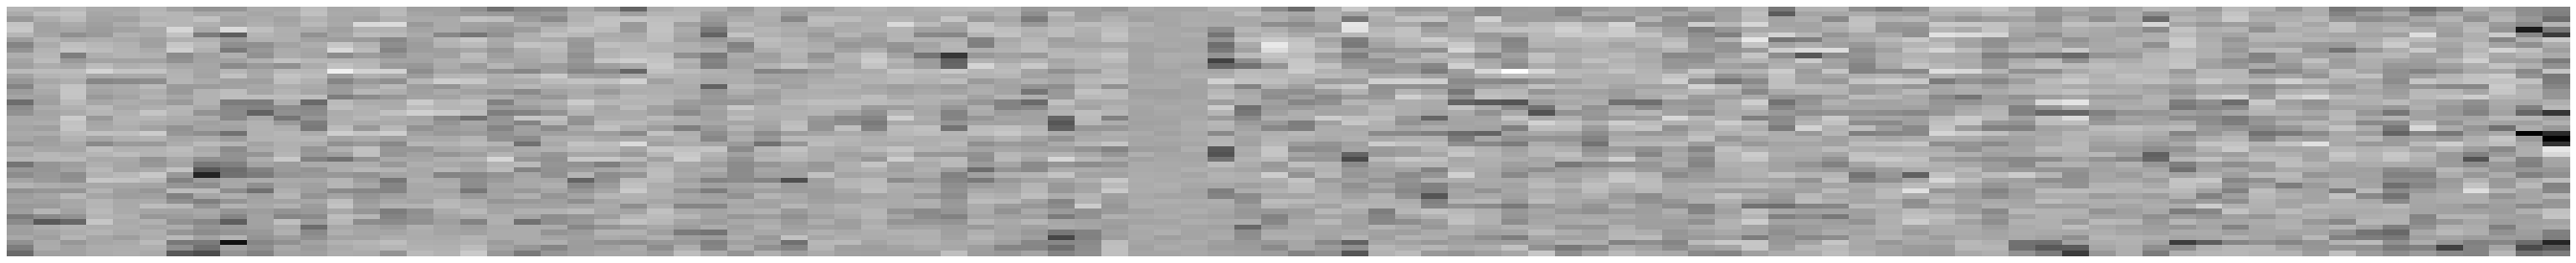

In [ ]:
x4 = model.conv4.weight.data
x4 = x4.cpu()
plot_filters_single_channel_big(x4)

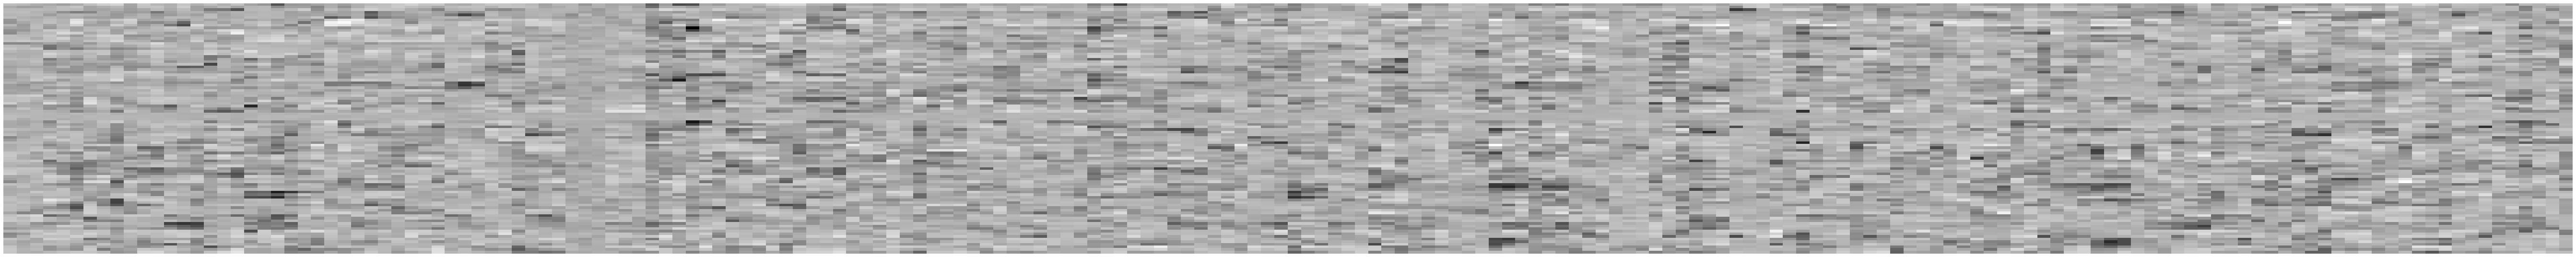

In [ ]:
x5 = model.conv5.weight.data
x5 = x5.cpu()
plot_filters_single_channel_big(x5)

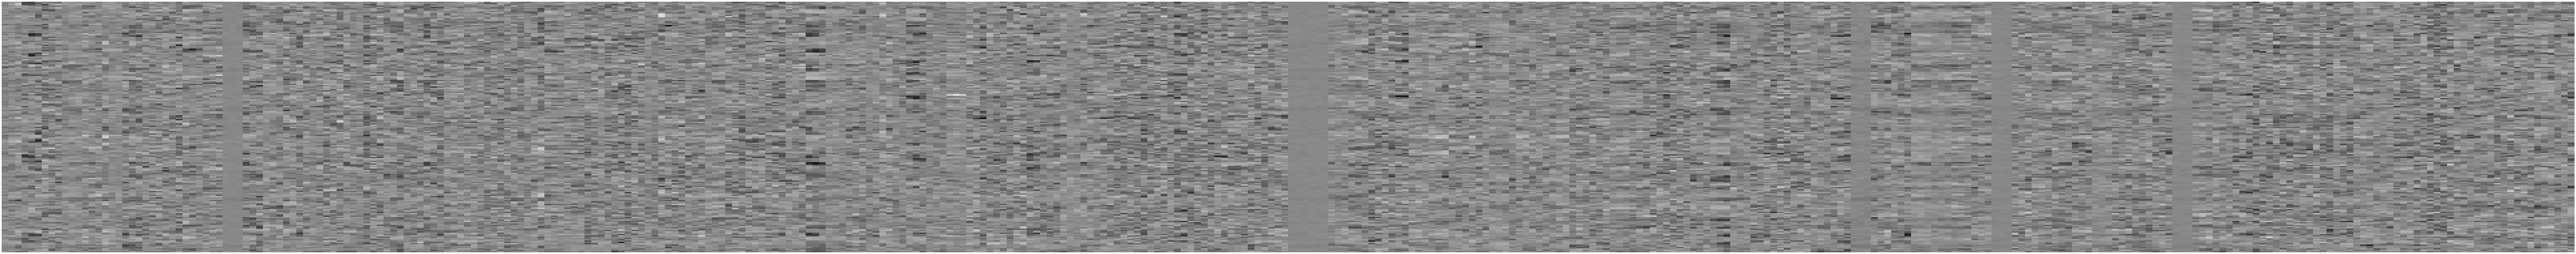

In [ ]:
x6 = model.conv6.weight.data
x6 = x6.cpu()
plot_filters_single_channel_big(x6)